In [1]:
import pandas as pd
from sys import path
path.append('../src')
from dstools.dstools import DStools as dst

In [2]:
#data = pd.read_fwf('./sample_dataset/auto-mpg.data', \
#                   names=[ 'mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin','name'], \
#                   na_values='?')

data =  pd.read_csv("./sample_dataset/wages_data_iso8859.csv", encoding='ISO-8859-1')
ds = dst()

* Data types from CSV before processing 

In [3]:
data.dtypes

case_number                   object
case_received_date            object
decision_date                 object
case_status                   object
employer_name                 object
employer_num_employees       float64
employer_yr_established      float64
job_education                 object
job_experience_num_months    float64
job_state                     object
job_foreign_lang_req          object
job_level                    float64
employee_citizenship          object
wage_offer                   float64
wage_unit                     object
dtype: object

* Seperating numerical/categorical/temporal features and applying datatypes to dataframe


<br>
process_dtypes options 
<br>
 - tapply to selectively transform datatypes
<br>
 - thr acts as a threshold beyond which a feature is considered numerical
<br>
 - for example if a feature has 2000 unique categories it could be transformed to encoded to numeric

In [4]:
features = ds.process_dtypes(data, tapply = False, thr=1000)

Data types from CSV after processing 
<br>
-Notice datetime and category updates to fetures

In [5]:
data.dtypes

case_number                   object
case_received_date            object
decision_date                 object
case_status                   object
employer_name                 object
employer_num_employees       float64
employer_yr_established      float64
job_education                 object
job_experience_num_months    float64
job_state                     object
job_foreign_lang_req          object
job_level                    float64
employee_citizenship          object
wage_offer                   float64
wage_unit                     object
dtype: object

* process dtype returns a dictionary of features, keyed according to their type

In [6]:
features.get('numfeatures'), features.get('numfeatures')

(['employer_num_employees',
  'employer_yr_established',
  'job_experience_num_months',
  'job_level',
  'wage_offer'],
 ['employer_num_employees',
  'employer_yr_established',
  'job_experience_num_months',
  'job_level',
  'wage_offer'])

* A Quick way to find out highly correlated pairs in data,  t controls the boundry correlation threshold to filter the features
<br> and generates a sns themed plot 

job_level and job_experience_num_months = 0.61412


[[0.6141162849461972, 3, 2]]

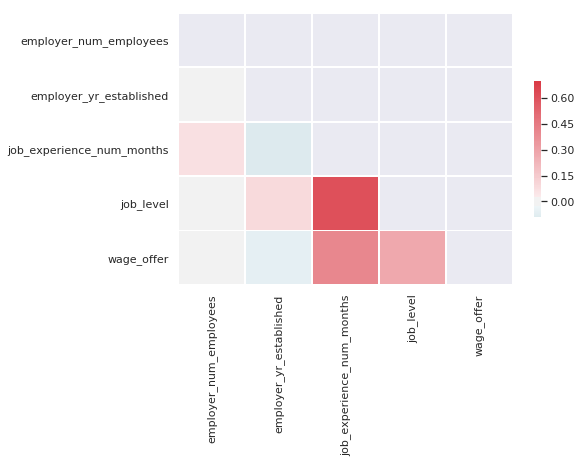

In [8]:
ds.check_correlations(data, features.get("numfeatures"), t=0.5, plot=True)